In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
mpl.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
data_train=pd.read_csv(r'F:\jupyter-notebook\比赛\DC竞赛\北京PM2.5浓度\北京PM2.5浓度回归分析训练赛\pm25_train.csv',engine='python')
data_valid=pd.read_csv(r'F:\jupyter-notebook\比赛\DC竞赛\北京PM2.5浓度\北京PM2.5浓度回归分析训练赛\pm25_test.csv',engine='python')

In [3]:
data_train.shape,data_valid.shape

((35746, 13), (6011, 12))

In [4]:
# 处理时间数据
import datetime
data_train['time']=data_train['date']+':'+data_train['hour'].astype(str)
data_train=data_train.set_index(data_train['time'])

data_valid['time']=data_valid['date']+':'+data_valid['hour'].astype(str)
data_valid=data_valid.set_index(data_valid['time'])

In [5]:
#data.sort_index(axis=1,inplace=True)

In [6]:
data_train.columns

Index(['date', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir',
       'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv', 'time'],
      dtype='object')

可视化查看数据间的关系

<Figure size 1440x2880 with 0 Axes>

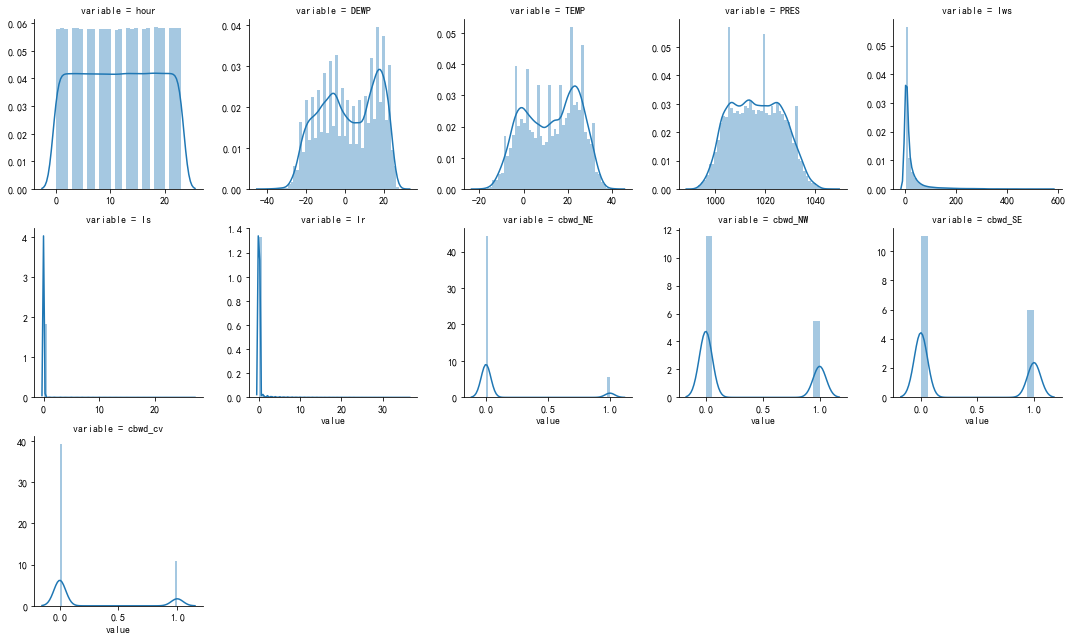

In [7]:
'''
数据转化  
FacetGrid 用于绘制各变量之间的关系图
'''
plt.figure(figsize=(20,40))
quantitative=[i for i in data_train.columns if data_train.dtypes[i] != 'object' and data_train.dtypes[i]!= 'str']
quantitative.remove('pm2.5')
#quantitative.remove('date')
#quantitative.remove('hour')
#quantitative.remove('time')
f=pd.melt(data_train,value_vars=quantitative)
g=sns.FacetGrid(f,col='variable',col_wrap=5,sharex=False,sharey=False,)
g=g.map(sns.distplot,'value')
plt.show()

In [8]:
'''
计算各变量之间的偏度（Skewness）
'''
from scipy.stats import norm,skew
skewed_feats=data_train[quantitative].apply(lambda x:skew(x.dropna())).sort_values(ascending=False)
skewness=pd.DataFrame({'skew':skewed_feats})
print(skewness)

              skew
Is       18.731680
Ir       11.604008
Iws       4.184652
cbwd_NE   2.425652
cbwd_cv   1.384114
cbwd_NW   0.770878
cbwd_SE   0.628339
PRES      0.070125
hour     -0.002138
DEWP     -0.131894
TEMP     -0.144433


In [9]:
'''
偏度设置
对偏度大于0.5的进行设置
'''
#data_train['Is']=np.log1p(data_train['Is'])
#data_train['Ir']=np.log1p(data_train['Ir'])
#data_train['Iws']=np.log1p(data_train['Iws'])
#data_train['cbwd_NE']=np.log1p(data_train['cbwd_NE'])
#data_train['cbwd_cv']=np.log1p(data_train['cbwd_cv'])
#data_train['cbwd_NW']=np.log1p(data_train['cbwd_NW'])
#data_train['cbwd_SE']=np.log1p(data_train['cbwd_SE'])

'\n偏度设置\n对偏度大于0.5的进行设置\n'

In [10]:
'''
计算各变量之间的偏度（Skewness）
'''
from scipy.stats import norm,skew
skewed_feats=data_train[quantitative].apply(lambda x:skew(x.dropna())).sort_values(ascending=False)
skewness=pd.DataFrame({'skew':skewed_feats})
print(skewness)

              skew
Is       18.731680
Ir       11.604008
Iws       4.184652
cbwd_NE   2.425652
cbwd_cv   1.384114
cbwd_NW   0.770878
cbwd_SE   0.628339
PRES      0.070125
hour     -0.002138
DEWP     -0.131894
TEMP     -0.144433


In [11]:
'''
计算各变量之间的峰度（kurtosis）
'''
from scipy.stats import norm,skew,kurtosis
kurted_feats=data_train[quantitative].apply(lambda x:kurtosis(x.dropna())).sort_values(ascending=False)
kurtness=pd.DataFrame({'kurt':kurted_feats})
print(kurtness)

               kurt
Is       419.298376
Ir       169.843452
Iws       22.111244
cbwd_NE    3.883789
cbwd_cv   -0.084228
PRES      -0.903594
TEMP      -1.129600
DEWP      -1.197341
hour      -1.205714
cbwd_NW   -1.405746
cbwd_SE   -1.605190


主要影响因子的 周期性

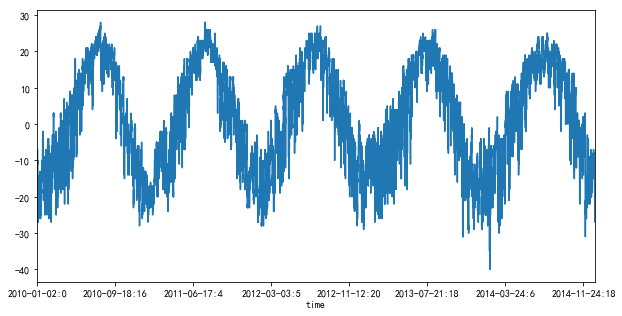

In [12]:
data_train['DEWP'].plot( figsize = (10,5))

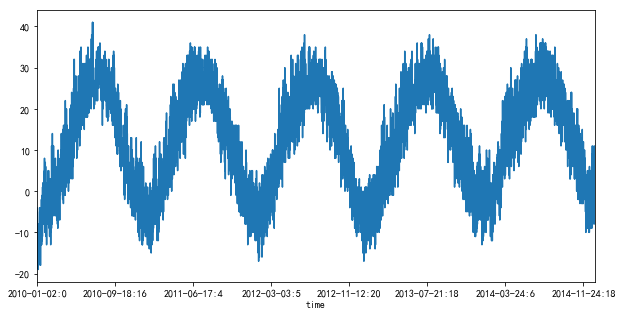

In [13]:
data_train['TEMP'].plot( figsize = (10,5))

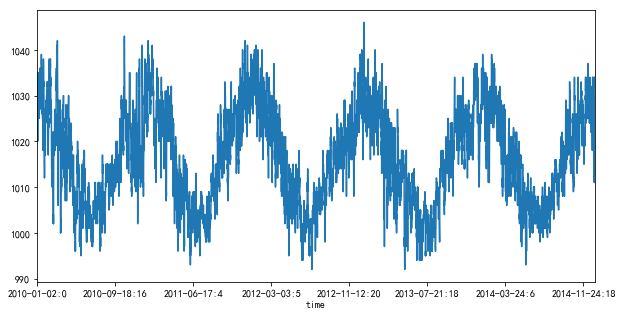

In [14]:
data_train['PRES'].plot( figsize = (10,5))

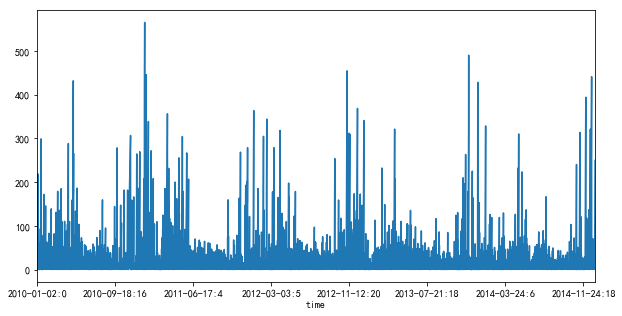

In [15]:
data_train['Iws'].plot( figsize = (10,5))

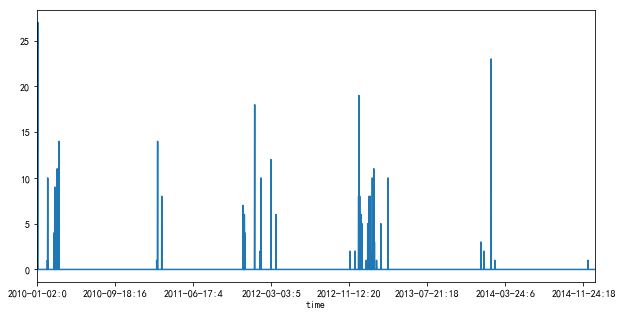

In [16]:
data_train['Is'].plot( figsize = (10,5))

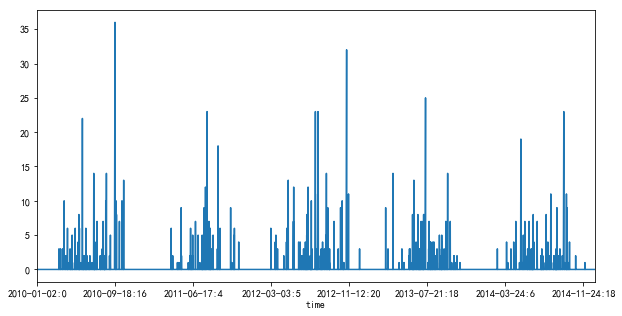

In [17]:
data_train['Ir'].plot( figsize = (10,5))

In [18]:
train_features=data_train[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'cbwd_NE',
       'cbwd_NW', 'cbwd_SE', 'cbwd_cv']]
train_labels=data_train[['pm2.5']]

In [19]:
from sklearn.model_selection import train_test_split
train_features,test_features, train_labels, test_labels = train_test_split(train_features,train_labels,test_size = 0.25,random_state=100)

In [20]:
print('训练集特征:', train_features.shape)
print('训练集标签:', train_labels.shape)
print('测试集特征:', test_features.shape)
print('测试集标签:', test_labels.shape)

训练集特征: (26809, 10)
训练集标签: (26809, 1)
测试集特征: (8937, 10)
测试集标签: (8937, 1)


In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_features=scaler.fit_transform(train_features)
test_features=scaler.transform(test_features)

In [22]:
scaler1=StandardScaler()
train_y=scaler1.fit_transform(train_labels)
test_y=scaler1.transform(test_labels)

In [34]:
# 导入算法
from sklearn.ensemble import RandomForestRegressor

# 建模
rf = RandomForestRegressor(n_estimators= 100, random_state=2,criterion='mse')

# 训练
rf.fit(train_features, train_y)

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

In [35]:
rf.feature_importances_

array([0.25820397, 0.2300014 , 0.19536649, 0.21368864, 0.00573067,
       0.01303342, 0.01628946, 0.03489484, 0.01849671, 0.01429439])

In [36]:
feature_list = list(data_train[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'cbwd_NE',
       'cbwd_NW', 'cbwd_SE', 'cbwd_cv']].columns)

In [37]:
# 得到特征重要性
importances = list(rf.feature_importances_)

# 转换格式
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# 排序
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# 对应进行打印
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: DEWP                 Importance: 0.26
Variable: TEMP                 Importance: 0.23
Variable: Iws                  Importance: 0.21
Variable: PRES                 Importance: 0.2
Variable: cbwd_NW              Importance: 0.03
Variable: cbwd_NE              Importance: 0.02
Variable: cbwd_SE              Importance: 0.02
Variable: Is                   Importance: 0.01
Variable: Ir                   Importance: 0.01
Variable: cbwd_cv              Importance: 0.01


[None, None, None, None, None, None, None, None, None, None]

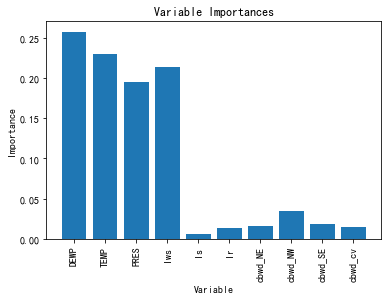

In [38]:
# 转换成list格式
x_values = list(range(len(importances)))

# 绘图
plt.bar(x_values, importances, orientation = 'vertical')

# x轴名字
plt.xticks(x_values, feature_list, rotation='vertical')

# 图名
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

In [40]:
train_features.shape,train_y.shape

((26809, 10), (26809, 1))

In [41]:
test_features.shape,test_y.shape

((8937, 10), (8937, 1))

In [42]:
X_train=train_features[:,:4]

In [43]:
X_test=test_features[:,:4]

In [44]:
X_train

array([[-0.6103508 , -1.10130057,  1.12360699, -0.46726931],
       [-1.51661587, -1.67697904,  1.61128866, -0.01438606],
       [ 0.29591427,  0.21453594, -0.63204701, -0.46726931],
       ...,
       [-2.00460475, -2.3348973 ,  1.70882499, -0.20445518],
       [ 0.92332854,  0.46125528,  0.44085266, -0.09564162],
       [-1.93489206, -1.67697904,  2.19650666, -0.38560848]])

In [45]:
train_y

array([[-0.17044903],
       [-0.98435235],
       [-0.2138572 ],
       ...,
       [-0.77816351],
       [ 4.50678206],
       [-0.84327577]])

In [46]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
model=linreg.fit(X_train, train_y)
print (model)
# 训练后模型截距
print (linreg.intercept_)
# 训练后模型权重（特征个数无变化）
print (linreg.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[6.01932678e-16]
[[ 0.62125088 -0.76293992 -0.16463141 -0.15444635]]


In [47]:
X_test

array([[-0.40121271, -1.10130057,  0.63592532,  4.80725023],
       [-0.6103508 , -1.51249948,  1.51375233, -0.3493373 ],
       [ 0.36562696,  0.21453594,  0.53838899,  0.14873297],
       ...,
       [ 0.43533966,  0.05005637, -0.14436534, -0.4490324 ],
       [-0.5406381 , -1.01906079,  0.63592532, -0.04153879],
       [-0.5406381 , -1.10130057, -0.04682901,  2.20403269]])

In [48]:
test_y

array([[ 1.24031673],
       [ 4.12696051],
       [-0.55027058],
       ...,
       [ 0.30704092],
       [-0.90838804],
       [-0.98435235]])

In [49]:
pred=model.predict(X_test)

In [50]:
#mse值
from sklearn import metrics 
mse_score=metrics.mean_squared_error(test_y,pred)
print('均方差',mse_score)

均方差 0.7626965258027587


In [54]:
pred_t=scaler1.inverse_transform(pred)
print(pred_t.shape)
print(pred_t)

(8937, 1)
[[ 75.09972743]
 [152.10743827]
 [ 94.27069366]
 ...
 [128.69025353]
 [130.34421493]
 [114.52475225]]


In [55]:
test_labels.shape

(8937, 1)

In [57]:
data_valid.head()

,date,hour,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv,time
time,,,,,,,,,,,,,
2010-01-07:0,2010-01-07,0,-21,-16.0,1035.0,8.95,0,0,0,1,0,0,2010-01-07:0
2010-01-07:1,2010-01-07,1,-21,-16.0,1035.0,0.45,0,0,0,0,0,1,2010-01-07:1
2010-01-07:2,2010-01-07,2,-22,-18.0,1036.0,1.34,0,0,0,0,0,1,2010-01-07:2
2010-01-07:3,2010-01-07,3,-23,-15.0,1036.0,4.02,0,0,0,1,0,0,2010-01-07:3
2010-01-07:4,2010-01-07,4,-24,-16.0,1035.0,7.15,0,0,0,1,0,0,2010-01-07:4


In [63]:
x=data_valid[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'cbwd_NE',
       'cbwd_NW', 'cbwd_SE', 'cbwd_cv']]

In [64]:
x=scaler.transform(x)

In [65]:
data=x[:,:4]

In [70]:
data

array([[-1.58632857, -2.3348973 ,  1.80636133, -0.30394766],
       [-1.58632857, -2.3348973 ,  1.80636133, -0.47618514],
       [-1.65604127, -2.49937686,  1.90389766, -0.45815086],
       ...,
       [-0.88920159, -1.01906079,  1.61128866, -0.46726931],
       [-0.95891429, -1.26578013,  1.61128866, -0.46726931],
       [-0.88920159, -1.18354035,  1.61128866, -0.43099813]])

In [71]:
pred=model.predict(data)

In [72]:
pred

array([[0.54543814],
       [0.57203959],
       [0.63537566],
       ...,
       [0.03196421],
       [0.17688717],
       [0.15185028]])

In [73]:
pred=scaler1.inverse_transform(pred)
print(pred)

[[148.96795445]
 [151.41923922]
 [157.25556611]
 ...
 [101.6520833 ]
 [115.00652221]
 [112.6994094 ]]


In [79]:
#创建一个空的DataFrame
alist=data_valid['time']
blist=['pm2.5']
df=pd.DataFrame(pred,index=alist,columns=blist)
print(df)
df.to_csv('result.csv')

                    pm2.5
time                     
2010-01-07:0   148.967954
2010-01-07:1   151.419239
2010-01-07:2   157.255566
2010-01-07:3   135.146516
2010-01-07:4   137.514446
...                   ...
2014-12-25:19  108.400204
2014-12-25:20  114.435752
2014-12-25:21  101.652083
2014-12-25:22  115.006522
2014-12-25:23  112.699409

[6011 rows x 1 columns]
